In [1]:
import nltk

In [2]:
#nltk.download()

In [3]:
from nltk.corpus import brown

In [4]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [5]:
from nltk.corpus import stopwords
from string import punctuation

In [6]:
russian_stopwords = stopwords.words("russian")
print(russian_stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [7]:
tokens = "O Обозначилась ошибка у вас третьего дня,там жду решения Так то"

In [8]:
tokens.lower()
print('O'in stopwords.words("russian"))

False


In [9]:
ps = nltk.PorterStemmer()
ps.stem('хорошенько')
from nltk.stem import WordNetLemmatizer 
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
# Lemmatize Single Word
print(lemmatizer.lemmatize("хорошенько"))
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("russian") 
stemmer.stem("хорошо")

хорошенько


'хорош'

In [10]:
print()

In [11]:
tokens = 'О Обозначилась ошибка у вас третьего дня,там жду "цифрового"решения  Так то.'
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("russian") 
stemmer.stem("хорошо")
def preprocess_str(string):
    string = string.lower()
    for w in string:
        if w in punctuation:
            string =string.replace(w," ")
    tokens = string.split(' ')
    tokens = [token for token in tokens if token not in stopwords.words("russian") 
             ]
    tokens = [stemmer.stem(token) for token in tokens ]
    while '' in tokens: 
        tokens.remove('')
        
    #return tokens
    return ' '.join(tokens)
print(preprocess_str(tokens))
print('' in preprocess_str(tokens))

обознач ошибк трет дня жду цифров решен
True


In [12]:
import pandas as pd
df = pd.read_excel('C:\\Users\\n.pugachev\\Desktop\\nlp_support_project\\СписокЗаявокДляАнализаML.xls')

In [13]:
df.head()

#data = df['ЗаявкаОписание'].copy()
data  = df[['ЗаявкаОписание','ЗаявкаКатегория','ЗаявкаВид']]
#,df['ЗаявкаКатегория'],df['ЗаявкаВид']]
#df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
data[data['ЗаявкаКатегория']==""] = ""
data['ЗаявкаОписание'] = data['ЗаявкаОписание'].astype('str')
data['ЗаявкаКатегория']=data['ЗаявкаКатегория'].astype('str')
data['ЗаявкаВид']=data['ЗаявкаВид'].astype('str')
#df.drop([0, 1])
print(len(data))
data= data[(data['ЗаявкаВид']!='Заявка на проект')]
data = data[(data['ЗаявкаВид']!='Организация релиза')]
print(len(data))

C:\Users\n.pugachev\AppData\Local\Continuum\anaconda3\envs\NLP_env\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\n.pugachev\AppData\Local\Continuum\anaconda3\envs\NLP_env\lib\site-packages\pandas\core\frame.py:3385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\n.pugachev\AppData\Local\Continuum\anaconda3\envs\NLP_env\lib\site-packages\pandas\core\frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

22966
22886


C:\Users\n.pugachev\AppData\Local\Continuum\anaconda3\envs\NLP_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\n.pugachev\AppData\Local\Continuum\anaconda3\envs\NLP_env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\n.pugachev\AppData\Local\Continuum\anaconda3\envs\NLP_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [14]:
#data[(data['ЗаявкаКатегория' == 'Закупка']).ЗаявкаВид = 'Закупка'
data = data.set_value(data[(data['ЗаявкаКатегория'] == 'Закупка')].index,'ЗаявкаВид','Закупка')
#df.set_value(  df  [(df['b']>                 0.5)      ].index,'b',3 )

C:\Users\n.pugachev\AppData\Local\Continuum\anaconda3\envs\NLP_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [15]:
data.head()

,ЗаявкаОписание,ЗаявкаКатегория,ЗаявкаВид
0,Ежедневный контроль работоспособности систем в...,ПО и оборудование,Запрос на обслуживание (настройка рабочего мес...
1,В связи с увольнением прошу принять ноутбук на...,ПО и оборудование,Запрос на обслуживание (настройка рабочего мес...
2,"не выбирается название в графе ""перевозчик""",Информационные системы,Ошибка в работе информационной системы (некорр...
3,"При выписке пропуска, при выборе организации И...",Информационные системы,Ошибка в работе информационной системы (некорр...
4,При выписке документов в программе УТ БД 1С П...,Информационные системы,Ошибка в работе информационной системы (некорр...


In [16]:
data.describe()

,ЗаявкаОписание,ЗаявкаКатегория,ЗаявкаВид
count,22886,22886,22886
unique,21525,3,7
top,Ежедневный контроль работоспособности систем в...,ПО и оборудование,Запрос на обслуживание (настройка рабочего мес...
freq,117,13272,8239


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22886 entries, 0 to 22965
Data columns (total 3 columns):
ЗаявкаОписание     22886 non-null object
ЗаявкаКатегория    22886 non-null object
ЗаявкаВид          22886 non-null object
dtypes: object(3)
memory usage: 1.3+ MB


In [18]:
data['text_format'] = data['ЗаявкаОписание'].apply(preprocess_str)

In [19]:
data['text_format'].head()

0    ежедневн контрол работоспособн сист видеонаблюден
1               связ увольнен прош приня ноутбук склад
2                        выбира назван граф перевозчик
3    выписк пропуск выбор организац ип михайленк юр...
4    выписк документ программ ут бд 1с предприят вм...
Name: text_format, dtype: object

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS, TSNE

In [21]:
data.describe()

,ЗаявкаОписание,ЗаявкаКатегория,ЗаявкаВид,text_format
count,22886,22886,22886,22886
unique,21525,3,7,21208
top,Ежедневный контроль работоспособности систем в...,ПО и оборудование,Запрос на обслуживание (настройка рабочего мес...,ежедневн контрол работоспособн сист видеонаблюден
freq,117,13272,8239,117


In [25]:
data['vectorizer'] = data['text_format'].copy
tfidf_vectorizer = TfidfVectorizer( min_df = 0.05)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['vectorizer'].astype('str'))
tfidf_words = tfidf_vectorizer.get_feature_names()


In [26]:
tfidf_matrix.shape, len(tfidf_words)

((22886, 330), 330)

In [ ]:
data.head()

In [33]:
#data = data.drop(['vectorizer1'], axis = 1)

In [27]:
data['category_id'] = data['ЗаявкаВид'].factorize()[0]

In [28]:
data.head()

,ЗаявкаОписание,ЗаявкаКатегория,ЗаявкаВид,text_format,vectorizer,category_id
0,Ежедневный контроль работоспособности систем в...,ПО и оборудование,Запрос на обслуживание (настройка рабочего мес...,ежедневн контрол работоспособн сист видеонаблюден,<bound method NDFrame.copy of 0 ежеднев...,0
1,В связи с увольнением прошу принять ноутбук на...,ПО и оборудование,Запрос на обслуживание (настройка рабочего мес...,связ увольнен прош приня ноутбук склад,<bound method NDFrame.copy of 0 ежеднев...,0
2,"не выбирается название в графе ""перевозчик""",Информационные системы,Ошибка в работе информационной системы (некорр...,выбира назван граф перевозчик,<bound method NDFrame.copy of 0 ежеднев...,1
3,"При выписке пропуска, при выборе организации И...",Информационные системы,Ошибка в работе информационной системы (некорр...,выписк пропуск выбор организац ип михайленк юр...,<bound method NDFrame.copy of 0 ежеднев...,1
4,При выписке документов в программе УТ БД 1С П...,Информационные системы,Ошибка в работе информационной системы (некорр...,выписк документ программ ут бд 1с предприят вм...,<bound method NDFrame.copy of 0 ежеднев...,1


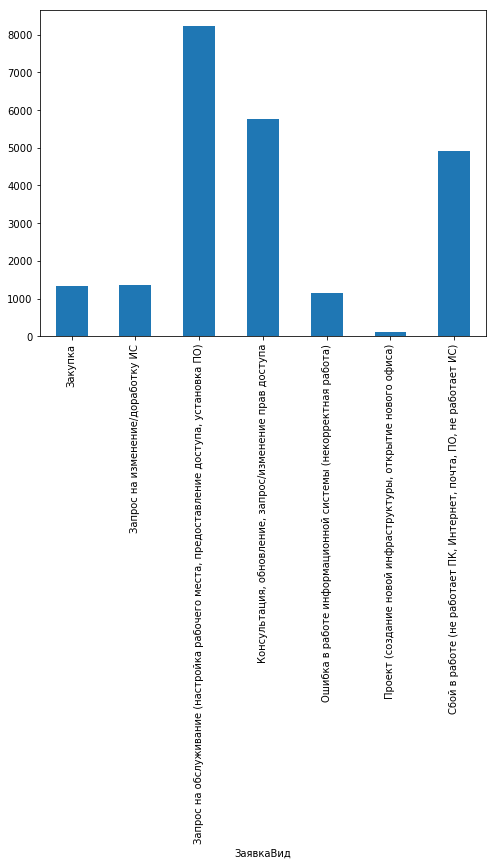

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('ЗаявкаВид').vectorizer.count().plot.bar(ylim=0)
plt.show()#добавить закупки(у них пустой вид)

In [44]:
data1 = data.groupby('ЗаявкаВид').vectorizer.count()
data.groupby('ЗаявкаВид').vectorizer.count()[:].min()


124

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#unuderstandable
rus = RandomUnderSampler(random_state=0)
rus.fit(, y)
X_resampled, y_resampled = rus.sample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
pass
data1.head(100)

In [31]:
data['category_id']


0        0
1        0
2        1
3        1
4        1
5        0
6        0
7        2
8        0
9        0
10       3
11       0
12       2
13       0
14       0
15       0
16       0
17       4
18       0
19       0
20       0
21       3
22       5
23       3
24       3
25       0
26       0
27       2
28       0
29       4
        ..
22936    0
22937    0
22938    0
22939    3
22940    5
22941    0
22942    0
22943    0
22944    3
22945    0
22946    0
22947    2
22948    0
22949    5
22950    0
22951    2
22952    0
22953    1
22954    0
22955    1
22956    1
22957    2
22958    2
22959    2
22960    0
22961    3
22962    4
22963    0
22964    0
22965    0
Name: category_id, Length: 22886, dtype: int64

In [223]:
from collections import Counter
#X = data[(data.columns[-2])]
X = tfidf_matrix
print(X.shape)
#data.drop(['vectorizer1'], axis = 1)
y = data[(data.columns[-1])]
rus = RandomUnderSampler(random_state=0)
X1_resampled, y_resampled = rus.fit_resample(dat1 , y)
print(sorted(Counter(y_resampled).items()))
print(X1_resampled)


(22886, 330)
[(0, 124), (1, 124), (2, 124), (3, 124), (4, 124), (5, 124), (6, 124)]
[['Прошу установить на ноутбуке программу Консультант Плюс.'
  'ПО и оборудование'
  'Запрос на обслуживание (настройка рабочего места, предоставление доступа, установка ПО)'
  'прош установ ноутбук программ консультант плюс'
  <bound method NDFrame.copy of 0        ежедневн контрол работоспособн сист видеонаблюден
1                   связ увольнен прош приня ноутбук склад
2                            выбира назван граф перевозчик
3        выписк пропуск выбор организац ип михайленк юр...
4        выписк документ программ ут бд 1с предприят вм...
5                                           настро принтер
6        необходим увелич обь дисков пространств сервер...
7        прош объясн отража код увольнен сотрудник осно...
8                прош установ рабоч ноутбук программ pdf24
9        добр ден треб картридж принтер hp officejet pr...
10       браузер пропа кнопк импорт резюм е стафф пропа...
11       

In [217]:
tfidf_matrix

<22886x330 sparse matrix of type '<class 'numpy.float64'>'
	with 7552380 stored elements in Compressed Sparse Row format>

In [35]:
tfidf_matrix[0:100]

<100x330 sparse matrix of type '<class 'numpy.float64'>'
	with 33000 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.model_selection import train_test_split
import numpy as np
train, test = train_test_split(tfidf_matrix[0:10],data['category_id'][0:10], train_size = 0.8 )

ValueError: too many values to unpack (expected 2)

In [47]:
tfidf_matrix.shape[0]
data['category_id'][0:10]
data[''][0:10]

0    0
1    0
2    1
3    1
4    1
5    0
6    0
7    2
8    0
9    0
Name: category_id, dtype: int64

In [48]:
tfidf_matrix[0:10].shape

(10, 330)

In [219]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_resampled,y_resampled)

ValueError: could not convert string to float: 'Прошу установить на ноутбуке программу Консультант Плюс.'

In [ ]:
from gensim.models import KeyedVectors


In [161]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(vectorizer.transform('first'))

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


ValueError: Iterable over raw text documents expected, string object received.

In [164]:

#https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

'Vocabulary content:\n   (0, 8)\t0.38408524091481483\n  (0, 3)\t0.38408524091481483\n  (0, 6)\t0.38408524091481483\n  (0, 2)\t0.5802858236844359\n  (0, 1)\t0.46979138557992045\n  (1, 8)\t0.281088674033753\n  (1, 3)\t0.281088674033753\n  (1, 6)\t0.281088674033753\n  (1, 1)\t0.6876235979836938\n  (1, 5)\t0.5386476208856763\n  (2, 8)\t0.267103787642168\n  (2, 3)\t0.267103787642168\n  (2, 6)\t0.267103787642168\n  (2, 0)\t0.511848512707169\n  (2, 7)\t0.511848512707169\n  (2, 4)\t0.511848512707169\n  (3, 8)\t0.38408524091481483\n  (3, 3)\t0.38408524091481483\n  (3, 6)\t0.38408524091481483\n  (3, 2)\t0.5802858236844359\n  (3, 1)\t0.46979138557992045'

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
def lemma_text(text):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)
def clean_sentence(x):
    x = x.lower()
    x = clean_text(x)
    x = clean_numbers(x)
    x = replace_typical_misspell(x)
    x = remove_stopwords(x)
    x = replace_contractions(x)
    x = lemma_text(x)
    x = x.replace("'","")
    return x